<a href="https://colab.research.google.com/github/RuwaAbey/Finaly_Year_Project_G09/blob/main/pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install torch==2.1.0+cu118 torchvision==0.16.0+cu118 torchaudio==2.1.0+cu118 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
# check NVCC version
!nvcc -V

# check GCC version
!gcc --version

# check python in conda environment
!which python

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/usr/local/bin/python


In [3]:
import torch
import torchvision
import torchaudio
print("Torch version:", torch.__version__)

print("Torch version:", torchvision.__version__)
print("Torch version:", torchaudio.__version__)
print("CUDA available:", torch.cuda.is_available())

Torch version: 2.1.0+cu118
Torch version: 0.16.0+cu118
Torch version: 2.1.0+cu118
CUDA available: True


In [4]:
!pip install "numpy<2"

In [5]:
from transformers import BertModel
model = BertModel.from_pretrained("bert-base-uncased")
print(model)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [15]:

# install MMEngine, MMCV and MMDetection using MIM
%pip install -U openmim
!mim install mmengine
!mim install "mmcv==2.1.0"
!mim install "mmdet<3.3.0,>=3.0.0"

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.1 MB/s eta 0:00:00
  Attempting uninstall: mmdet
    Found existing installation: mmdet 3.3.0
    Uninstalling mmdet-3.3.0:
      Successfully uninstalled mmdet-3.3.0


In [18]:
import mmcv
print("mmcv version:", mmcv.__version__)

mmcv version: 2.0.1


In [8]:
# for better Colab compatibility, install xtcocotools from source
%pip install git+https://github.com/jin-s13/xtcocoapi

  Cloning https://github.com/jin-s13/xtcocoapi to /tmp/pip-req-build-v2sbe0_w
  Running command git clone --filter=blob:none --quiet https://github.com/jin-s13/xtcocoapi /tmp/pip-req-build-v2sbe0_w
  Resolved https://github.com/jin-s13/xtcocoapi to commit d74033ff1635e9002133b2380862bc2b728584d2
  Preparing metadata (setup.py) ... done


In [9]:

!git clone https://github.com/open-mmlab/mmpose.git
# The master branch is version 1.x
%cd mmpose
%pip install -r requirements.txt
%pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.

fatal: destination path 'mmpose' already exists and is not an empty directory.
/content/mmpose
Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
Obtaining file:///content/mmpose
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-wjumi4b9/mmpose.egg-info
  writing manifest file '/tmp/pip-pip-egg-info-wjumi4b9/mmpose.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-wjumi4b9/mmpose.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/jin-s13/xtcocoapi to /tmp/pip-install-u0qmrn9r/xtcocotools_6eabbd5038934dd8b93778ab0d8e076c
  Running command git version
  git version 2.34.1
  Running command git clone --filter=blob:none https://github.com/jin-s13/xtcocoapi /tmp/pip-install-u0qmrn9r/xtcocotools_6eabbd5038934dd8b93778ab0d8e076c
  Cloning into '/tmp/pip-install-u0qmrn9r/xtcocotools_6eabbd5038934dd8b93778ab0d8e076c'...
  Running command git rev-parse HEAD
  d740

In [19]:
# Check Pytorch installation
import torch, torchvision

print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose

print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 2.1.0+cu118 True
torchvision version: 0.16.0+cu118
mmpose version: 1.3.2
cuda version: 11.8
compiler information: GCC 9.3


In [21]:
import mmcv
print("mmcv version:", mmcv.__version__)

mmcv version: 2.0.1


In [22]:
import mmcv
from mmcv import imread
import mmengine
from mmengine.registry import init_default_scope
import numpy as np

from mmpose.apis import inference_topdown
from mmpose.apis import init_model as init_pose_estimator
from mmpose.evaluation.functional import nms
from mmpose.registry import VISUALIZERS
from mmpose.structures import merge_data_samples

try:
    from mmdet.apis import inference_detector, init_detector
    has_mmdet = True
except (ImportError, ModuleNotFoundError):
    has_mmdet = False

local_runtime = False

try:
    from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
    local_runtime = True

img = 'tests/data/coco/000000197388.jpg'
pose_config = 'configs/body_2d_keypoint/topdown_heatmap/coco/td-hm_hrnet-w32_8xb64-210e_coco-256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth'
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

device = 'cuda:0'
cfg_options = dict(model=dict(test_cfg=dict(output_heatmaps=True)))


# build detector
detector = init_detector(
    det_config,
    det_checkpoint,
    device=device
)


# build pose estimator
pose_estimator = init_pose_estimator(
    pose_config,
    pose_checkpoint,
    device=device,
    cfg_options=cfg_options
)

# init visualizer
pose_estimator.cfg.visualizer.radius = 3
pose_estimator.cfg.visualizer.line_width = 1
visualizer = VISUALIZERS.build(pose_estimator.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_pose_estimator
visualizer.set_dataset_meta(pose_estimator.dataset_meta)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Downloading: "https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth" to /root/.cache/torch/hub/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w32_coco_256x192-c78dce93_20200708.pth


In [23]:
def visualize_img(img_path, detector, pose_estimator, visualizer,
                  show_interval, out_file):
    """Visualize predicted keypoints (and heatmaps) of one image."""

    # predict bbox
    scope = detector.cfg.get('default_scope', 'mmdet')
    if scope is not None:
        init_default_scope(scope)
    detect_result = inference_detector(detector, img_path)
    pred_instance = detect_result.pred_instances.cpu().numpy()
    bboxes = np.concatenate(
        (pred_instance.bboxes, pred_instance.scores[:, None]), axis=1)
    bboxes = bboxes[np.logical_and(pred_instance.labels == 0,
                                   pred_instance.scores > 0.3)]
    bboxes = bboxes[nms(bboxes, 0.3)][:, :4]

    # predict keypoints
    pose_results = inference_topdown(pose_estimator, img_path, bboxes)
    data_samples = merge_data_samples(pose_results)

    # show the results
    img = mmcv.imread(img_path, channel_order='rgb')

    visualizer.add_datasample(
        'result',
        img,
        data_sample=data_samples,
        draw_gt=False,
        draw_heatmap=True,
        draw_bbox=True,
        show=False,
        wait_time=show_interval,
        out_file=out_file,
        kpt_thr=0.3)

In [24]:
visualize_img(
    img,
    detector,
    pose_estimator,
    visualizer,
    show_interval=0,
    out_file=None)

vis_result = visualizer.get_image()

03/31 02:26:35 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".
03/31 02:26:37 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".


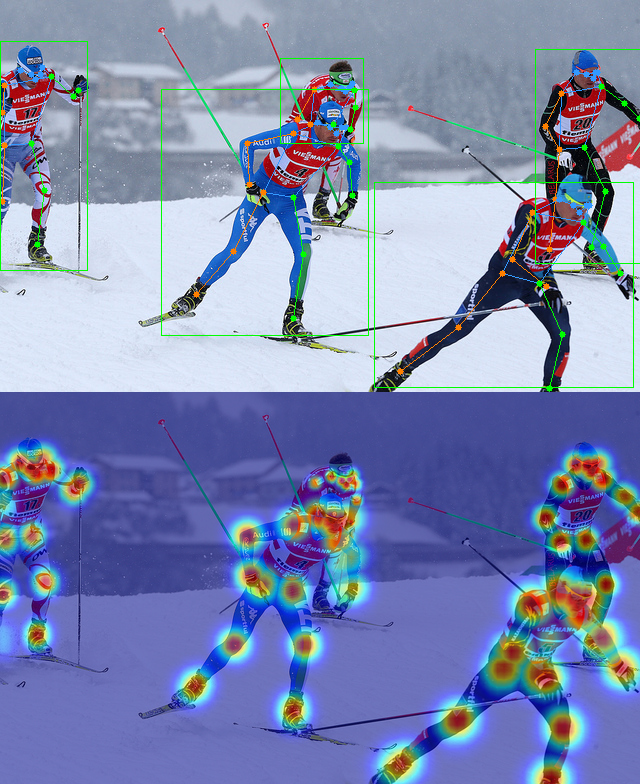

In [25]:

if local_runtime:
    from IPython.display import Image, display
    import tempfile
    import os.path as osp
    import cv2
    with tempfile.TemporaryDirectory() as tmpdir:
        file_name = osp.join(tmpdir, 'pose_results.png')
        cv2.imwrite(file_name, vis_result[:,:,::-1])
        display(Image(file_name))
else:
    cv2_imshow(vis_result[:,:,::-1]) #RGB2BGR to fit cv2